In [7]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [8]:
import os
import glob

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [10]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(555, 18)


In [11]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency']
df['Requests'] = df['Requests'].astype(int)

In [12]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [13]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp10 Redeployment

In [14]:
df_10.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Benchmark,Infinite,Vertical,Threads,Connections,ReqSec
64,42470.00,2000,241875.0,sn,1,1,4,512,1612.49
94,1870.00,3000,177887.0,sn,1,1,4,512,1185.39
115,467.45,5000,749008.0,mm,1,1,4,512,4993.43
128,1000.00,6000,548433.0,mm,1,1,4,512,3652.96
136,263.68,14000,2095945.0,hr,1,1,4,512,13972.72


In [15]:
df_10.shape

(6, 18)

In [17]:
labels = df_10['Benchmark'].unique()

In [39]:
df_10

,Latency,Requests,Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
64,42470.00,2000,241875.0,0,swarm,sn,1,exp10,0,1,1,4,512,150,5387.112,71303.168,10166.195,1612.49
94,1870.00,3000,177887.0,0,swarm,sn,1,exp10,0,1,1,4,512,150,42121.699,132710.400,31905.317,1185.39
115,467.45,5000,749008.0,0,swarm,mm,1,exp10,0,1,1,4,512,150,23.132,1481.728,80.096,4993.43
128,1000.00,6000,548433.0,0,swarm,mm,1,exp10,0,1,1,4,512,150,25602.778,66486.272,23291.654,3652.96
136,263.68,14000,2095945.0,0,swarm,hr,1,exp10,0,1,1,4,512,150,48.412,876.032,52.356,13972.72
141,3240.00,16000,2399158.0,0,swarm,hr,1,exp10,0,1,1,4,512,150,638.511,5853.184,777.912,15994.31


In [46]:
print(df_10.to_latex(index=False))

\begin{tabular}{rrrrllrlrrrrrrrrrr}
\toprule
 Latency &  Requests &  Throughput &  Baseline & Orchestrator & Benchmark &  Infinite &   Exp &  Availability &  Horizontal &  Vertical &  Threads &  Connections &  Duration &      Mean &        Max &    StdDev &   ReqSec \\
\midrule
42470.00 &      2000 &    241875.0 &         0 &        swarm &        sn &         1 & exp10 &             0 &           1 &         1 &        4 &          512 &       150 &  5387.112 &  71303.168 & 10166.195 &  1612.49 \\
 1870.00 &      3000 &    177887.0 &         0 &        swarm &        sn &         1 & exp10 &             0 &           1 &         1 &        4 &          512 &       150 & 42121.699 & 132710.400 & 31905.317 &  1185.39 \\
  467.45 &      5000 &    749008.0 &         0 &        swarm &        mm &         1 & exp10 &             0 &           1 &         1 &        4 &          512 &       150 &    23.132 &   1481.728 &    80.096 &  4993.43 \\
 1000.00 &      6000 &    548433.0 &         0

/var/folders/nv/p_yx9k0j763cnbwqk5j012t80000gn/T/ipykernel_15739/760853311.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_10.to_latex(index=False))


Take a closer look at throughput, Requests, and Reqsec actually. 

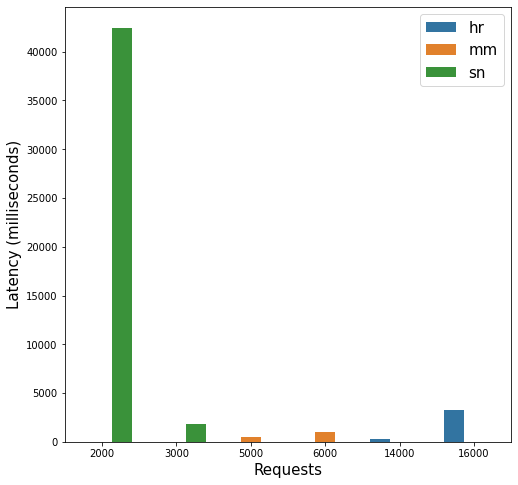

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
labels = ["sn", "mm", "hr"]
p = sns.barplot(x="Requests", y="Latency", data=df_10, hue="Benchmark")
p.axes.legend(loc="upper right", fontsize=15)
plt.ylabel('Latency (milliseconds)', fontsize=15)
# p.axes.xaxis.set_visible(False)
plt.xlabel('Requests', fontsize=15)
plt.savefig("Figures/exp10-broken-duration150.png", bbox_inches='tight')

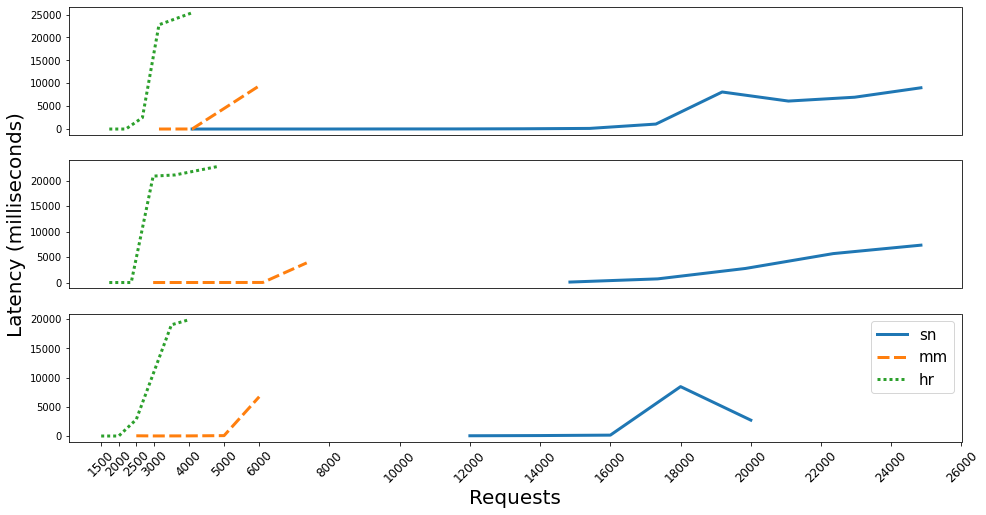

In [21]:
# Exp5
fig, ax = plt.subplots(3, 1, figsize=(16,8))
xticks = df_7['Requests'].unique()

plt.subplot(311)
p = sns.lineplot(x="Requests", y="Latency", data=df_7, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
# p.axes.yaxis.set_visible(False)
plt.ylabel("")
p.set_xticks(xticks)

# plt.ylabel('Latency (milliseconds)', fontsize=12)


# Exp7
plt.subplot(312)
p = sns.lineplot(x="Requests", y="Latency", data=df_8, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
plt.ylabel('Latency (milliseconds)', fontsize=20)
p.axes.xaxis.set_visible(False)


# Exp8
plt.subplot(313)
p = sns.lineplot(x="Requests", y="Latency", data=df_9, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.set_xticks(xticks)
# plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.ylabel("")

plt.xticks(rotation = 45, fontsize=12)
plt.xlabel('Requests', fontsize=20)

# plt.ylabel()

plt.legend(labels, fontsize=15)
plt.savefig("Figures/exp9-exp8-exp7.png", bbox_inches='tight')